In [1]:
import pandas

from bessie.backtests import BacktestInputData, run_backtest, BatterySpec
from bessie.core import Region
from bessie.strategies import (
    ForecastBaseline,
    ForecastBaselineFCAS,
    QuantilePicker,
    ClarabelOptimised,
    ClarabelOptimisedFCAS,
)
from bessie import analysis


start = pandas.Timestamp("2022-01-01 00:00:00")
end = pandas.Timestamp("2022-02-01 00:00:00")

battery = BatterySpec(
    e_max=50,
    p_max=50,
    deg=0.00001,
    eta_chg=0.9,
    eta_dchg=0.95,
)
data = BacktestInputData.from_aemo_forecasts(
    start=start,
    end=end,
    region=Region.NSW,
)
strategies = {
    "Forecast": ForecastBaseline(50, 75),
    "Forecast FCAS": ForecastBaselineFCAS(50, 75),
    "Quantile": QuantilePicker(0.1, 0.9),
    "Clarabel": ClarabelOptimised(gamma=20, horizon=12 * 6),
    "Clarabel FCAS": ClarabelOptimisedFCAS(gamma=20, horizon=12 * 6),
}

2026-02-25 12:37:36,196 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_predispatch/_get_predispatch_price_single/year=2022month=1.netcdf
2026-02-25 12:37:36,337 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_predispatch/_get_predispatch_price_single/year=2022month=2.netcdf
2026-02-25 12:37:36,442 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_p5min/_get_p5min_price_single/year=2022month=1.netcdf
2026-02-25 12:37:36,457 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_p5min/_get_p5min_price_single/year=2022month=2.netcdf
2026-02-25 12:37:36,667 - INFO - root - nemosis query start: 2022/01/01 00:00:00
2026-02-25 12:37:36,667 - INFO - root - nemosis query end: 2022/02/01 00:00:00
2026-02-25 12:37:36,667 - INFO - nemosis.data_fetch_methods - Compiling data for table DISPATCHPRICE
2026-02-25 12:37:36,972 - INFO - nemosis.data_fetch_methods - Returning DISPATCHPRICE.


In [2]:
results = {
    name: run_backtest(data, battery, strat, False)
    for name, strat in strategies.items()
}

2026-02-25 12:37:37,009 - INFO - root - Running BESS backtest for strategy ForecastBaseline
2026-02-25 12:37:37,373 - INFO - root - Running BESS backtest for strategy ForecastBaselineFCAS
2026-02-25 12:37:37,736 - INFO - root - Running BESS backtest for strategy QuantilePicker
2026-02-25 12:37:39,519 - INFO - root - Running BESS backtest for strategy ClarabelOptimised
2026-02-25 12:38:03,594 - INFO - root - Running BESS backtest for strategy ClarabelOptimisedFCAS


In [3]:
analysis.backtest_scorecard(data, battery, results)

Region:            NSW1
Energy capacity:   50 MWh
Power rating:      50 MW
Duration:          1.0 H
Degredation rate:  0.001000%
η (charge):        90.0%
η (discharge):     95.0%
N. Days:           31


Forecast Forecast FCAS Quantile Clarabel  \
Revenue     Total                    $6,082       $25,061  $30,132  $74,263   
            Per day                    $196          $808     $972   $2,396   
            Energy Total             $6,082        $4,158  $30,132  $74,263   
            Energy Per day             $196          $134     $972   $2,396   
            FCAS Total                   $0       $20,902       $0       $0   
            FCAS Per day                 $0          $674       $0       $0   
Activity    Charging intervals           48            65      184      371   
            Charging %                 0.5%          0.7%     2.1%     4.2%   
            Idle intervals            8,840         8,813    8,582    8,121   
            Idle %                    99.0%         98.7%    96.1%    91.0%   
            Discharging intervals        40            50      162      436   
            Discharging %              0.4%          0.6%     1.8%     4.9%   
Degradation Energy Total Actions         88           115      346      807   
            Energy Actions per day      2.8           3.7     11.2     26.0   
            FCAS Total Actions            0        53,486        0        0   
            FCAS Actions per day        0.0       1,725.4      0.0      0.0   
            Final capacity (MWh)      49.96         49.94    49.83    49.69   
            Capacity remaining %     99.91%        99.88%   99.65%   99.37%   

                                   Clarabel FCAS  
Revenue     Total                        $86,000  
            Per day                       $2,774  
            Energy Total                 $72,690  
            Energy Per day                $2,345  
            FCAS Total                   $13,309  
            FCAS Per day                    $429  
Activity    Charging intervals             4,351  
            Charging %                     48.7%  
            Idle intervals                 3,240  
            Idle %                         36.3%  
            Discharging intervals          5,677  
            Discharging %                  63.6%  
Degradation Energy Total Actions          10,028  
            Energy Actions per day         323.5  
            FCAS Total Actions            33,375  
            FCAS Actions per day         1,076.6  
            Final capacity (MWh)           49.69  
            Capacity remaining %          99.38%

2026-02-25 12:38:43,533 - INFO - choreographer.browsers.chromium - Chromium init'ed with kwargs {}
2026-02-25 12:38:43,533 - INFO - choreographer.browsers.chromium - Found chromium path: /app/.venv/lib/python3.12/site-packages/choreographer/cli/browser_exe/chrome-linux64/chrome
2026-02-25 12:38:43,534 - INFO - choreographer.utils._tmpfile - Temp directory created: /tmp/tmpv78kdhru.
2026-02-25 12:38:43,535 - INFO - choreographer.browser_async - Opening browser.
2026-02-25 12:38:43,535 - INFO - choreographer.utils._tmpfile - Temp directory created: /tmp/tmp1cnv129a.
2026-02-25 12:38:43,547 - INFO - choreographer.browsers.chromium - Temporary directory at: /tmp/tmp1cnv129a
2026-02-25 12:38:43,764 - INFO - kaleido.kaleido - Conforming 1 to file:///tmp/tmpv78kdhru/index.html
2026-02-25 12:38:43,766 - INFO - kaleido.kaleido - Waiting on all navigates
2026-02-25 12:38:45,084 - INFO - kaleido.kaleido - All navigates done, putting them all in queue.
2026-02-25 12:38:45,086 - INFO - kaleido.kale

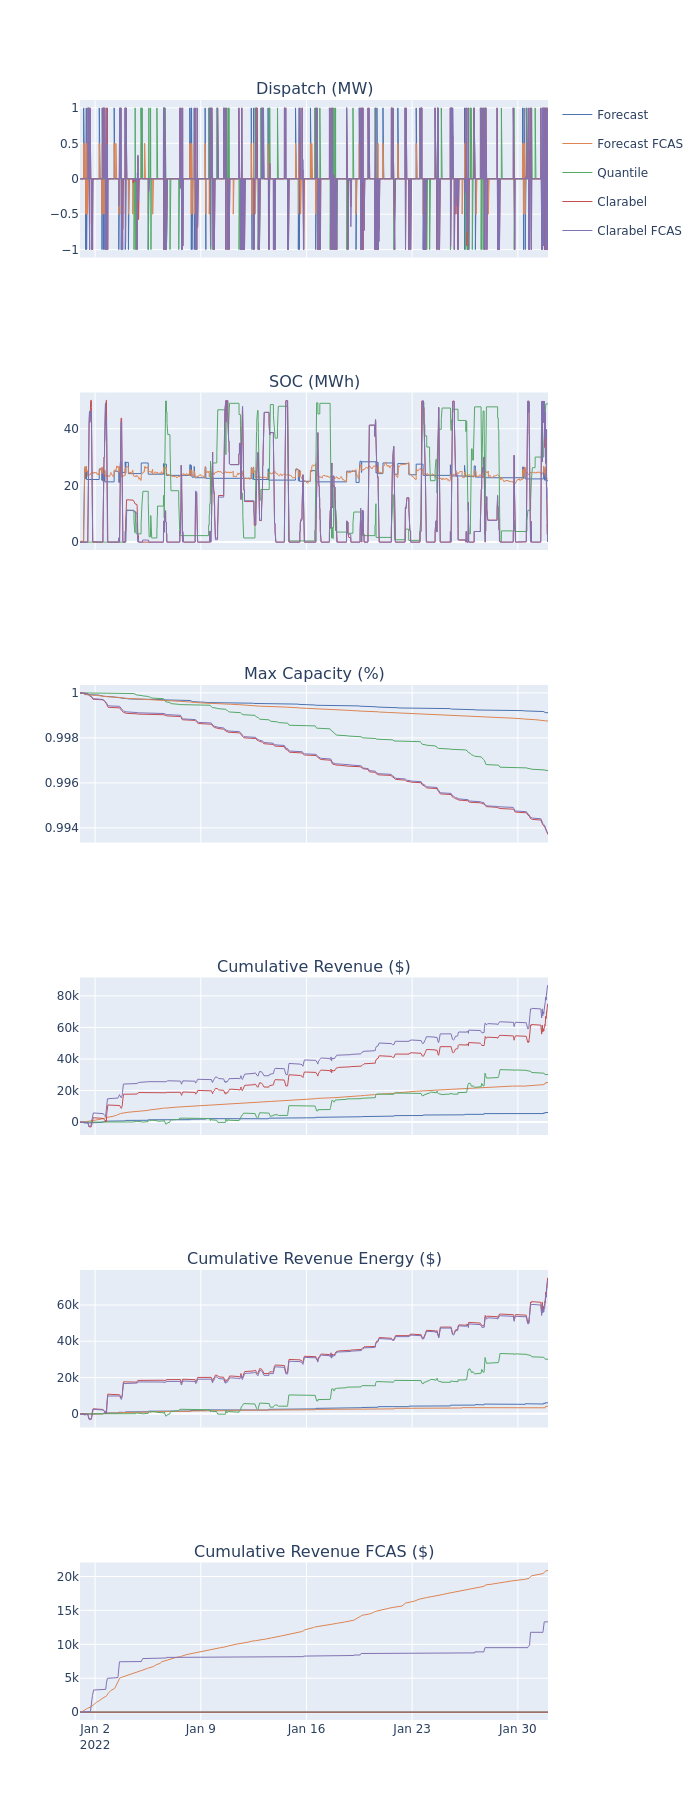

In [4]:
analysis.backtest_comparison(data, battery, results, resampler=False).show(
    "png"
)